In [3]:
# import all models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer


In [4]:
df = pd.read_csv('sih.csv')
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [5]:
df.drop(["id"], axis=1, inplace=True)
df.drop(["Date"], axis=1, inplace=True)
df.drop(["Renovation Year"], axis=1, inplace=True)

In [6]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,122006,52.9047,-114.485,2060,4500,1,51,805000


In [7]:
df.shape


(14620, 20)

In [9]:
df.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of bedrooms,14620.0,3.379343,0.938719,1.0000,3.0000,3.0000,4.0000,3.300000e+01
number of bathrooms,14620.0,2.129583,0.769934,0.5000,1.7500,2.2500,2.5000,8.000000e+00
living area,14620.0,2098.262996,928.275721,370.0000,1440.0000,1930.0000,2570.0000,1.354000e+04
lot area,14620.0,15093.281122,37919.621304,520.0000,5010.7500,7620.0000,10800.0000,1.074218e+06
number of floors,14620.0,1.502360,0.540239,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront present,14620.0,0.007661,0.087193,0.0000,0.0000,0.0000,0.0000,1.000000e+00
number of views,14620.0,0.233105,0.766259,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition of the house,14620.0,3.430506,0.664151,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade of the house,14620.0,7.682421,1.175033,4.0000,7.0000,7.0000,8.0000,1.300000e+01
Area of the house(excluding basement),14620.0,1801.783926,833.809963,370.0000,1200.0000,1580.0000,2240.0000,9.410000e+03


In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(14620, 20)

In [14]:
df.size

292400

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [16]:
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Postal Code', 'Lattitude', 'Longitude',
       'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

# using the prices as an index


In [18]:
df.set_index("Price").head(10)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
Price,,,,,,,,,,,,,,,,,,,
2380000,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,122003,52.8645,-114.557,2880,5400,2,58
1400000,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,122004,52.8878,-114.470,2470,4000,2,51
1200000,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,122004,52.8852,-114.468,2940,6600,1,53
838000,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,122005,52.9532,-114.321,3350,42847,3,76
805000,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,122006,52.9047,-114.485,2060,4500,1,51
790000,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,122007,52.9133,-114.590,2380,4750,1,67
785000,5,3.25,3660,11995,2.0,0,2,3,10,3660,0,2006,122008,52.7637,-114.050,3320,11241,3,72
750000,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,122006,52.9254,-114.482,1570,10578,3,71
750000,3,2.50,2390,6550,1.0,0,2,4,8,1440,950,1955,122009,52.8014,-114.598,2010,6550,1,73


# Total of the prices

In [19]:
df.Price.sum()

7879189032

In [20]:
df.corr()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
number of bedrooms,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,0.473599,0.300332,0.152954,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,0.684391,0.287190,0.498127,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,0.875793,0.441491,0.309602,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,0.183553,0.019755,0.051615,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,0.525643,-0.242976,0.481565,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,0.079831,0.071865,0.085441,-0.024226,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,0.254532,0.162672,0.293062,-0.055357,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,-0.152530,-0.167695,0.180609,-0.381718,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376
grade of the house,0.352945,0.663054,0.761835,0.110546,0.463082,0.079831,0.254532,-0.152530,1.000000,0.758222,0.167160,0.440358,-0.146342,0.115256,0.203754,0.720019,0.116725,0.000986,0.004940,0.671814
Area of the house(excluding basement),0.473599,0.684391,0.875793,0.183553,0.525643,0.071865,0.162672,-0.167695,0.758222,1.000000,-0.046445,0.419369,-0.083730,-0.000088,0.345899,0.737744,0.194670,-0.002894,0.001222,0.615220


<Axes: >

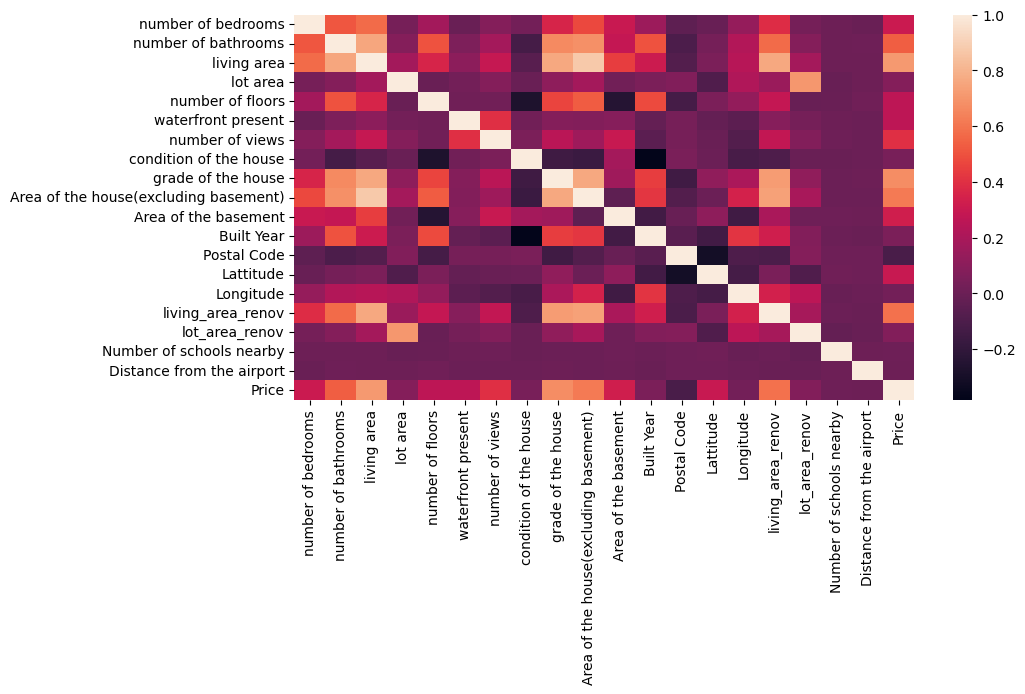

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

# It's seems like old buildings are most expensive, in my opinion maybe inside the capital or Luxurious places/Houses, as it showing

In [23]:
pd.pivot_table(df,index="Price", values="Built Year").head(10).round()

,Built Year
Price,
78000,1942.0
80000,1912.0
82000,1954.0
82500,1951.0
83000,1918.0
85000,1939.0
86500,1960.0
89000,1969.0
90000,1962.0


In [24]:
df.loc[:,["number of bedrooms", "number of bathrooms", "Lattitude", "Longitude","Price"]].tail(10)

,number of bedrooms,number of bathrooms,Lattitude,Longitude,Price
14610,4,2.75,52.6003,-114.361,272000
14611,3,1.75,52.5917,-114.242,261000
14612,3,1.00,52.7350,-114.449,260000
14613,3,1.00,52.5038,-114.491,241500
14614,3,1.75,52.5928,-114.240,240000
14615,2,1.50,52.6191,-114.472,221700
14616,3,2.00,52.5075,-114.393,219200
14617,2,1.00,52.7289,-114.507,209000
14618,4,1.00,52.7157,-114.411,205000
14619,3,1.00,52.5338,-114.552,146000


# Lets check the data by Visualizing them

Text(0.5, 0.98, 'Distribution of Bedrooms and Bathrooms')

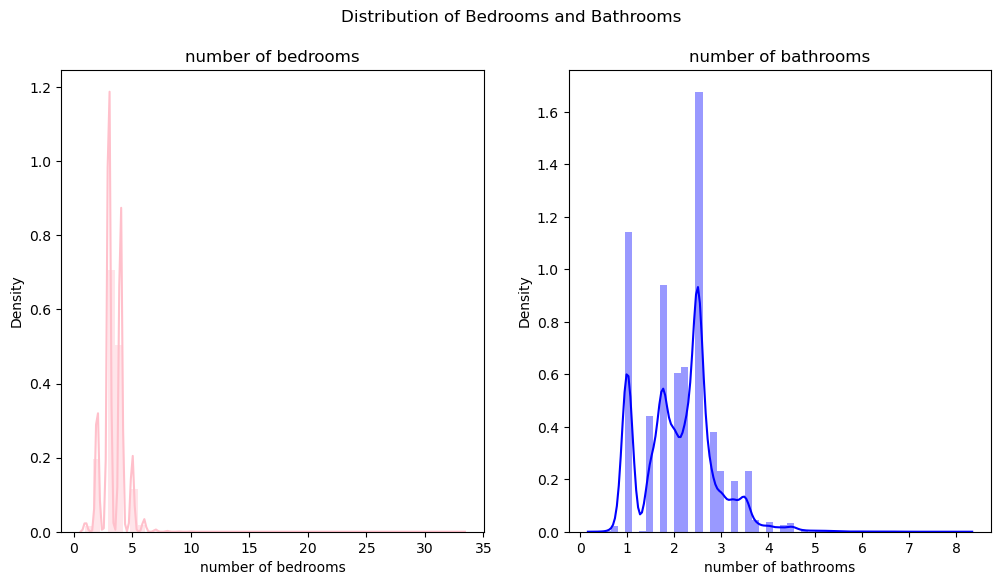

In [26]:
f = plt.figure(figsize=(12, 6))
ax=f.add_subplot(121)
sns.distplot(df["number of bedrooms"], color="pink")
plt.title("number of bedrooms")

ax=f.add_subplot(122)
sns.distplot(df["number of bathrooms"], color="b")
plt.title("number of bathrooms")
plt.suptitle("Distribution of Bedrooms and Bathrooms")

Text(0.5, 1.0, 'Distribution of Prices by nearby Schools')

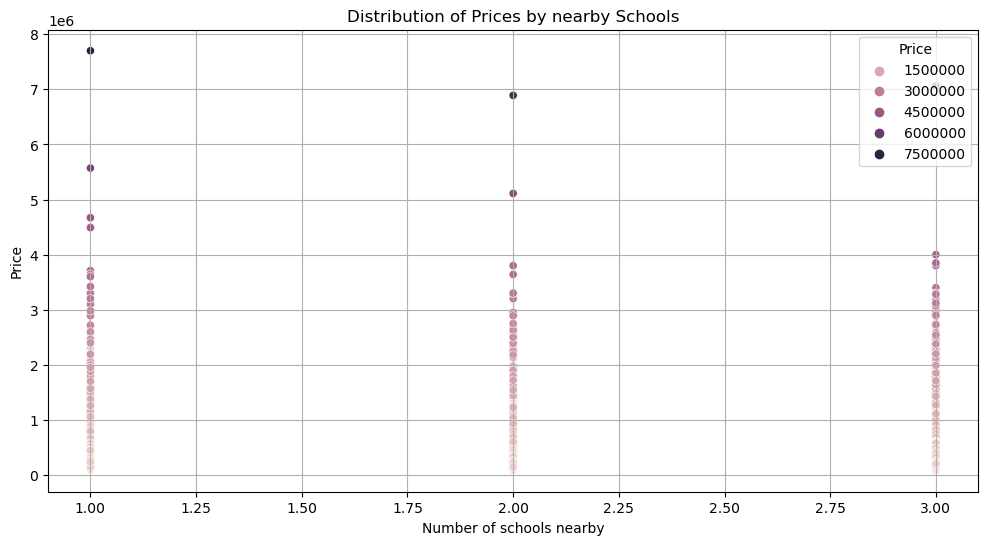

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df, x="Number of schools nearby", y="Price", hue="Price")
plt.grid()
plt.title("Distribution of Prices by nearby Schools")

Text(0.5, 1.0, 'Distribution of Prices by Distance from the Airport')

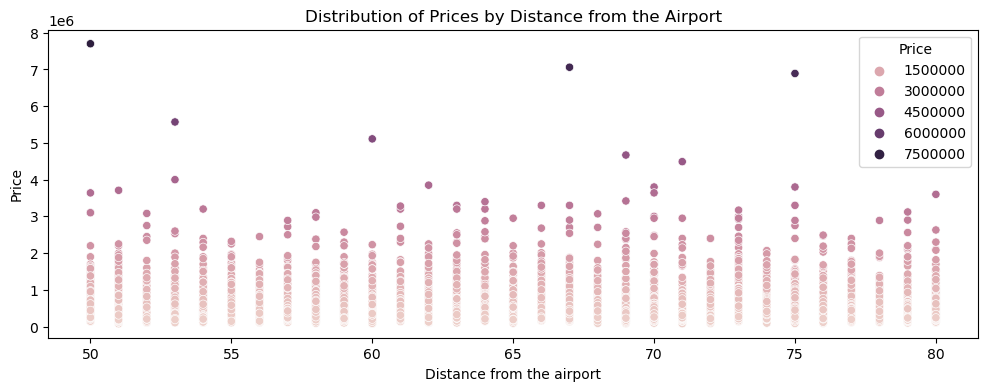

In [30]:
plt.figure(figsize=(12,4))
sns.scatterplot(df, x="Distance from the airport", y="Price", hue="Price")
plt.title("Distribution of Prices by Distance from the Airport")

Text(0.5, 1.0, 'Distribution of Prices by Number of Bedrooms')

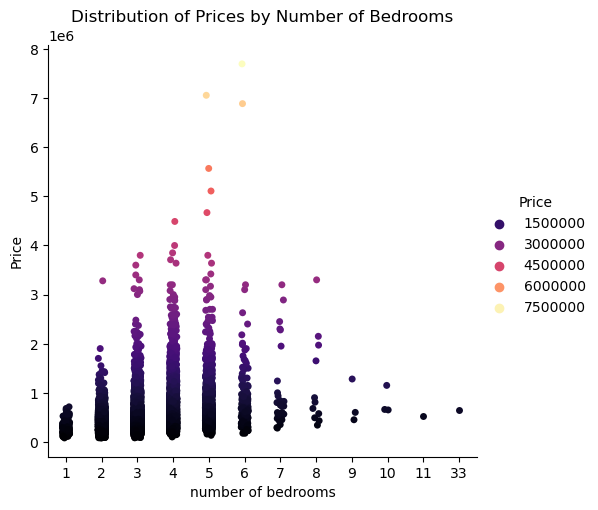

In [31]:
sns.catplot(data=df, x="number of bedrooms", y="Price", palette="magma", hue="Price")
plt.title("Distribution of Prices by Number of Bedrooms")

Text(0.5, 1.0, 'Distribution of Prices with Built Year')

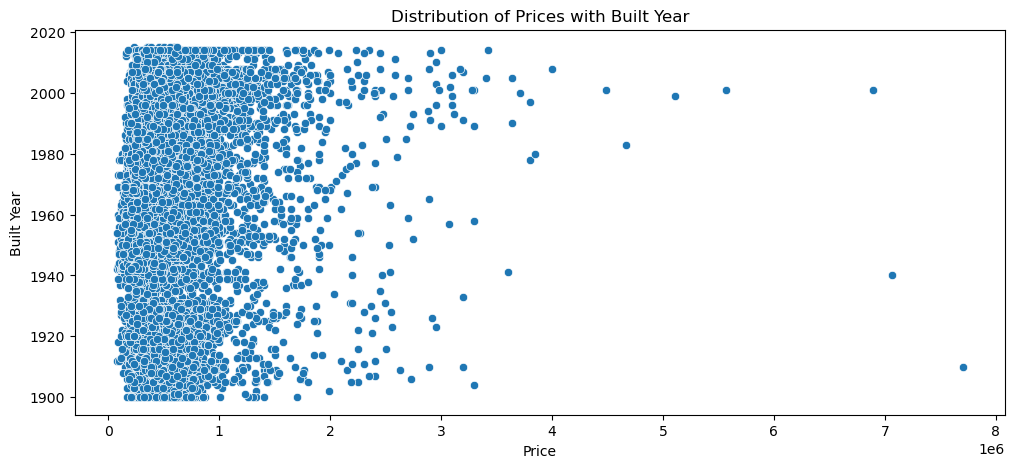

In [36]:
plt.figure(figsize=(12,5))
sns.scatterplot(df,x='Price',y='Built Year')
plt.title("Distribution of Prices with Built Year")

<Axes: xlabel='number of bathrooms', ylabel='Count'>

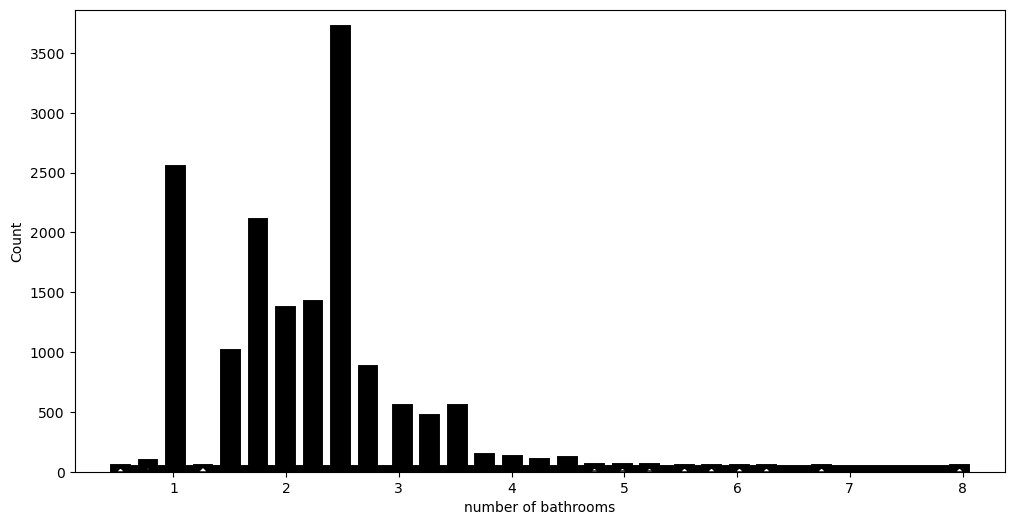

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df["number of bathrooms"], color="black", linewidth=10)

# let's copy the data to avoid Changing the Original data

In [38]:
data1 = df.copy()

In [39]:
data1.astype(int)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2,3650,9050,2,0,4,5,10,3370,280,1921,122003,52,-114,2880,5400,2,58,2380000
1,4,2,2920,4000,1,0,0,5,8,1910,1010,1909,122004,52,-114,2470,4000,2,51,1400000
2,5,2,2910,9480,1,0,0,3,8,2910,0,1939,122004,52,-114,2940,6600,1,53,1200000
3,4,2,3310,42998,2,0,0,3,9,3310,0,2001,122005,52,-114,3350,42847,3,76,838000
4,3,2,2710,4500,1,0,0,4,8,1880,830,1929,122006,52,-114,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1,1556,20000,1,0,0,4,7,1556,0,1957,122066,52,-114,2250,17286,3,76,221700
14616,3,2,1680,7000,1,0,0,4,7,1680,0,1968,122072,52,-114,1540,7480,3,59,219200
14617,2,1,1070,6120,1,0,0,3,6,1070,0,1962,122056,52,-114,1130,6120,2,64,209000
14618,4,1,1030,6621,1,0,0,4,6,1030,0,1955,122042,52,-114,1420,6631,3,54,205000


# The X is how feature Y is the target

In [40]:
X = ["number of bedrooms", "number of bathrooms", "Lattitude", "Longitude"]

In [41]:
X = data1.drop(["Price"], axis=1)
y = data1.Price

# First of all we need to Define the Model, which mean to check the accuracy

In [42]:
model_dec = DecisionTreeRegressor(random_state=0)
model_dec.fit(X,y)
print(model_dec.predict(X.head()))

[2380000. 1400000. 1200000.  838000.  805000.]


# Secondly we need to Evaluate our model by using the Mean_absolute_error

In [43]:
home_price = model_dec.predict(X)
mean_absolute_error(y,home_price)

0.0

# To Split the data into training and Validation

In [44]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, random_state=0)
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

valid_data = dtr.predict(x_valid)
print(mean_absolute_error(y_valid, valid_data))

101322.58577291382


In [45]:
def get_mae(max_leaf_nodes, x_train, x_valid, y_train, y_valid):
    mydtr = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    mydtr.fit(x_train, y_train)
    pred_y = mydtr.predict(x_valid)
    mae = mean_absolute_error(y_valid, pred_y)
    return (mae)

In [46]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_valid, y_train, y_valid)
    print("Max leaf nodes : %d \t\t Mean Absolute Error : %d" %(max_leaf_nodes, my_mae))

Max leaf nodes : 5 		 Mean Absolute Error : 151891
Max leaf nodes : 50 		 Mean Absolute Error : 104690
Max leaf nodes : 500 		 Mean Absolute Error : 92534
Max leaf nodes : 5000 		 Mean Absolute Error : 99141


In [47]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train,y_train)

x_val = rfr.predict(x_valid)
print(mean_absolute_error(y_valid, x_val))

69066.36734610124
